<a href="https://colab.research.google.com/github/Ahmadbahar911/Klasifikasi-hiu/blob/main/shark_classification_with_ResNet50.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import os
import tensorflow as tf
import PIL
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, GlobalAveragePooling2D, Dropout, Flatten
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.optimizers import Adam

In [ ]:
dataset_url = '/content/drive/MyDrive/Colab Notebooks/sharks/Shark'
train_dir = '/content/drive/MyDrive/Colab Notebooks/sharks/Shark/train'
test_dir = '/content/drive/MyDrive/Colab Notebooks/sharks/Shark/test'
val_dir = '/content/drive/MyDrive/Colab Notebooks/sharks/Shark/val'

In [ ]:
img_height,img_width=224,224
batch_size=32

train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
  train_dir,
  seed=123,
  shuffle=True,
  image_size=(img_height, img_width),
  batch_size=batch_size)

val_dataset = tf.keras.preprocessing.image_dataset_from_directory(
  val_dir,
  shuffle=False,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 1780 files belonging to 14 classes.
Found 70 files belonging to 14 classes.


In [ ]:
test_dataset = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    seed = 123,
    image_size=(img_height,img_width),
    shuffle=False
)

Found 70 files belonging to 14 classes.


In [ ]:
class_names = train_dataset.class_names
print(class_names)

['basking', 'blacktip', 'blue', 'bull', 'hammerhead', 'lemon', 'mako', 'nurse', 'sand tiger', 'thresher', 'tiger', 'whale', 'white', 'whitetip']


In [ ]:
len(class_names)

14

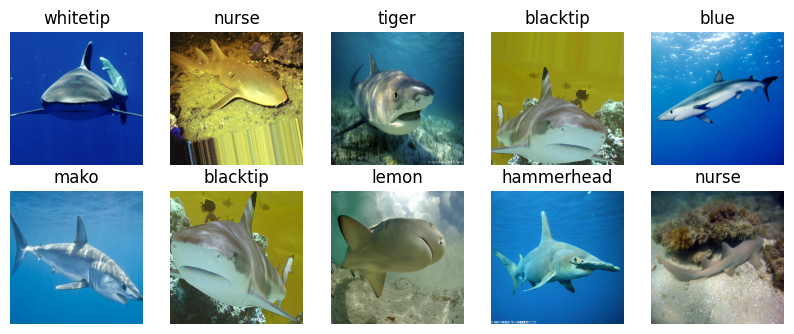

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
  for i in range(10):
    ax = plt.subplot(5, 5, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
from tensorflow.keras.applications import ResNet50

In [ ]:
model = Sequential()

base_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(224,224,3),
                   pooling='avg',classes=14,
                   weights='imagenet')

94765736/94765736 [==============================] - 1s 0us/step


In [ ]:
base_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

In [ ]:
for layer in base_model.layers:
        layer.trainable=False

In [ ]:
from tensorflow.keras.optimizers import Adam

In [ ]:
model.add(base_model)
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5)) # to prevent overfitting
model.add(Dense(14, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 512)               1049088   
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 14)                7182      
                                                                 
Total params: 24,643,982
Trainable params: 1,056,270
Non-trainable params: 23,587,712
_________________________________________________________________


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import ReduceLROnPlateau
callbacks = [
    ModelCheckpoint(filepath='/content/drive/MyDrive/Colab Notebooks/sharks/Shark_resnet50.h5',monitor='val_accuracy',mode='max',verbose=1,save_best_only=True),
    #ReduceLROnPlateau(monitor='val_loss', factor=np.sqrt(0.1), patience=5),
    #myCallback()
]

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.0001),
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [ ]:
history = model.fit(train_dataset,
                    epochs=25,
                    validation_data=val_dataset,
                    callbacks = [callbacks]
                   )

Epoch 1/25
56/56 [==============================] - ETA: 0s - loss: 2.2972 - accuracy: 0.3191
Epoch 1: val_accuracy improved from -inf to 0.35714, saving model to /content/drive/MyDrive/Colab Notebooks/sharks/Shark_resnet50.h5
56/56 [==============================] - 374s 7s/step - loss: 2.2972 - accuracy: 0.3191 - val_loss: 1.9825 - val_accuracy: 0.3571
Epoch 2/25
56/56 [==============================] - ETA: 0s - loss: 1.3126 - accuracy: 0.6045
Epoch 2: val_accuracy improved from 0.35714 to 0.47143, saving model to /content/drive/MyDrive/Colab Notebooks/sharks/Shark_resnet50.h5
56/56 [==============================] - 358s 6s/step - loss: 1.3126 - accuracy: 0.6045 - val_loss: 1.7148 - val_accuracy: 0.4714
Epoch 3/25
56/56 [==============================] - ETA: 0s - loss: 1.0304 - accuracy: 0.6910
Epoch 3: val_accuracy improved from 0.47143 to 0.50000, saving model to /content/drive/MyDrive/Colab Notebooks/sharks/Shark_resnet50.h5
56/56 [==============================] - 369s 6s/step

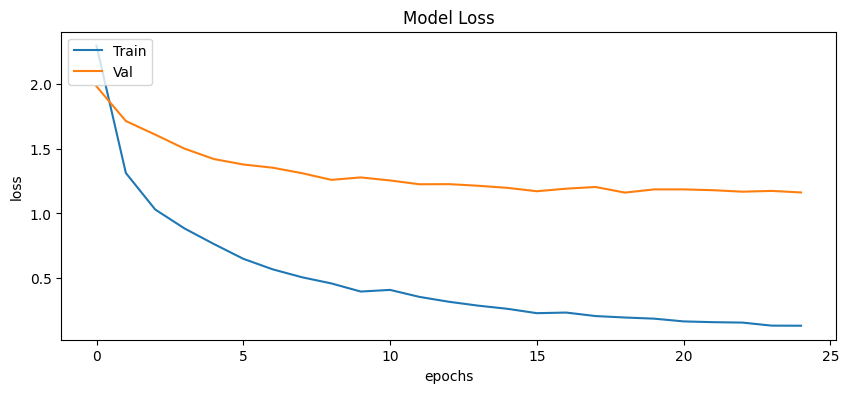

In [ ]:
plt.figure(figsize=(10,4))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['Train','Val'], loc= 'upper left')
plt.show()

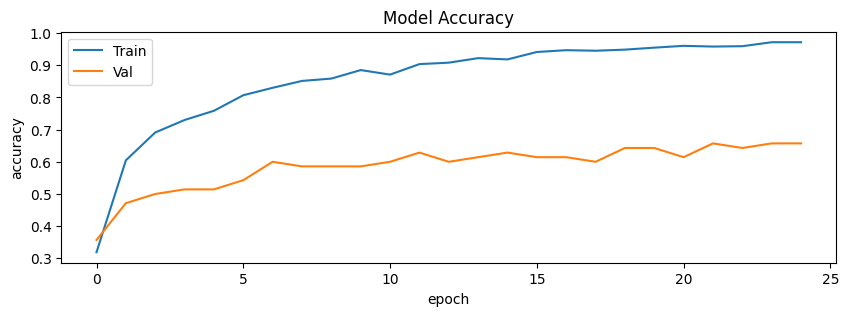

In [ ]:
plt.figure(figsize=(10,3))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [ ]:
test_images, test_labels = tuple(zip(*test_dataset))

predictions = model.predict(test_dataset)
score = tf.nn.softmax(predictions)

3/3 [==============================] - 15s 4s/step


In [ ]:
result = model.evaluate(test_dataset)
print("Test loss, test accuracy:", result)


3/3 [==============================] - 13s 3s/step - loss: 0.9339 - accuracy: 0.7143
Test loss, test accuracy: [0.9338622093200684, 0.7142857313156128]


In [ ]:
y_test = np.concatenate(test_labels)
y_pred = np.array([np.argmax(s) for s in score])

print(classification_report(y_test, y_pred, target_names=class_names))

              precision    recall  f1-score   support

     basking       1.00      1.00      1.00         5
    blacktip       0.67      0.40      0.50         5
        blue       0.80      0.80      0.80         5
        bull       0.60      0.60      0.60         5
  hammerhead       0.56      1.00      0.71         5
       lemon       0.40      0.40      0.40         5
        mako       1.00      0.60      0.75         5
       nurse       0.75      0.60      0.67         5
  sand tiger       0.83      1.00      0.91         5
    thresher       1.00      0.60      0.75         5
       tiger       0.60      0.60      0.60         5
       whale       0.83      1.00      0.91         5
       white       0.71      1.00      0.83         5
    whitetip       0.50      0.40      0.44         5

    accuracy                           0.71        70
   macro avg       0.73      0.71      0.71        70
weighted avg       0.73      0.71      0.71        70



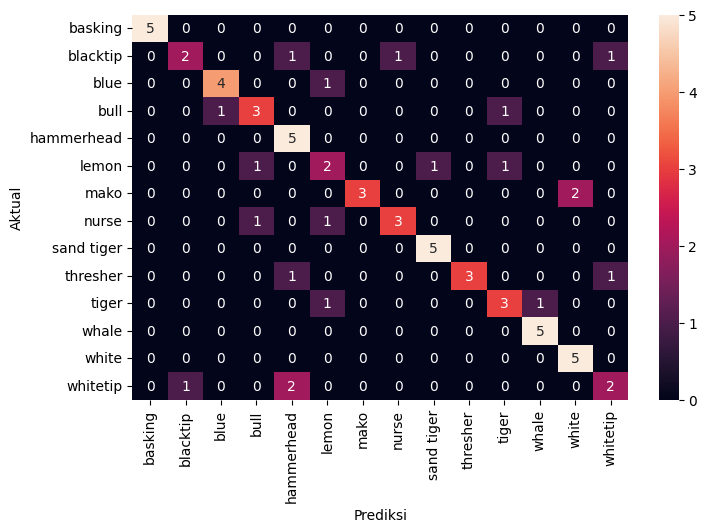

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True,  fmt=".0f",  xticklabels=class_names, yticklabels=class_names, ax=ax)
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.show()

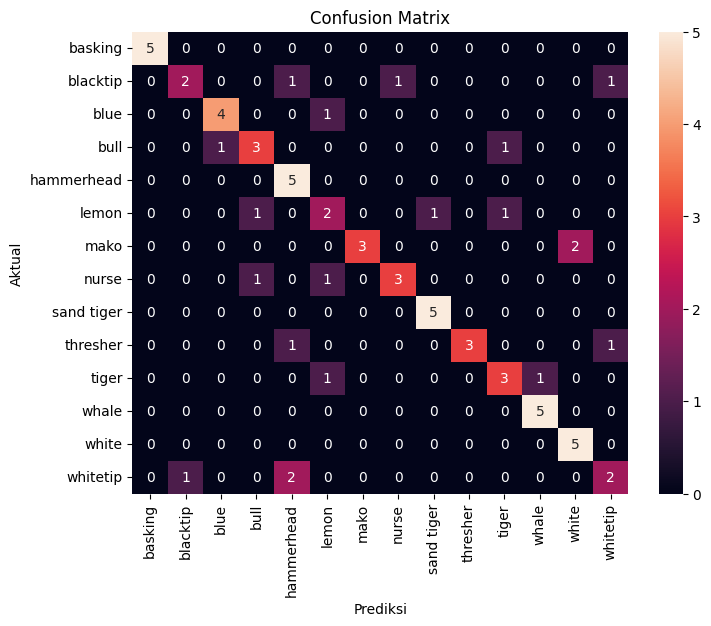

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Menampilkan matriks konfusi dalam bentuk heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix')
plt.show()
